# Simple Titanic Survival Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

## 1. Data

사용할 데이터는 Titanic 사고에서 생존자를 찾는 데이터

In [3]:
titanic = pd.read_csv("/content/drive/MyDrive/MLStudy/ML Algorithm/08_Clustering/simple_titanic.csv")

데이터의 Column 목록  
- survived: 생존 유무 (정답)
- Pclass: 탑승한 여객 클래스
- Sex: 성별
- Age: 나이
- Fare: 운임료
- Embarked: 승선 항구 위치

In [4]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')

In [5]:
label = titanic["Survived"]
data = titanic.drop(["Survived"], axis=1)

### 1.1 Data EDA
데이터 분포 확인

In [6]:
data.describe()

,Pclass,Age,Fare
count,1306.000000,1043.000000,1306.000000
mean,2.296325,29.813202,33.223956
std,0.837037,14.366254,51.765986
min,1.000000,0.170000,0.000000
25%,2.000000,21.000000,7.895800
50%,3.000000,28.000000,14.454200
75%,3.000000,39.000000,31.275000
max,3.000000,80.000000,512.329200


In [7]:
data["Sex"].value_counts()

male      842
female    464
Name: Sex, dtype: int64

In [8]:
data["Embarked"].value_counts()

S    913
C    270
Q    123
Name: Embarked, dtype: int64

빈 값이 있는지 확인하면 Age 변수에 빈 값이 있는 것을 확인할 수 있음

In [9]:
data.isna().sum()

Pclass        0
Sex           0
Age         263
Fare          0
Embarked      0
dtype: int64

정답의 비율을 확인

In [10]:
label.value_counts()

0    814
1    492
Name: Survived, dtype: int64

### 1.2 Data Preprocess

In [11]:
data.loc[:, "Sex"] = data["Sex"].map({"male": 0, "female": 1})
data.loc[:, "Embarked"] = data["Embarked"].map({"S": 0, "C": 1, "Q": 2})

<ipython-input-11-b660d1ff99c3>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, "Sex"] = data["Sex"].map({"male": 0, "female": 1})
<ipython-input-11-b660d1ff99c3>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, "Embarked"] = data["Embarked"].map({"S": 0, "C": 1, "Q": 2})


### 1.3 Data Split

데이터를 Train, Valid, Test로 분할

In [12]:
from sklearn.model_selection import train_test_split

train_data, validation_data, train_label, validation_label = train_test_split(data, label, train_size=0.6, random_state=2021)

In [13]:
valid_data, test_data, valid_label, test_label = train_test_split(validation_data, validation_label, train_size=0.5, random_state=2021)

In [14]:
print(f"train_data size: {len(train_label)}, {len(train_label) / len(data):.2f}")
print(f"valid_data size: {len(valid_label)}, {len(valid_label) / len(data):.2f}")
print(f"test_data size: {len(test_label)}, {len(test_label) / len(data):.2f}")

train_data size: 783, 0.60
valid_data size: 261, 0.20
test_data size: 262, 0.20


index 리셋시키기

In [15]:
train_data = train_data.reset_index(drop=True)
valid_data = valid_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)
train_label = train_label.reset_index(drop=True)
valid_label = valid_label.reset_index(drop=True)
test_label = test_label.reset_index(drop=True)

## 2. 빈 데이터를 채우는 방법  
빈 값이 많은 Age 피처를 채우는 방법  
1. 사용하지 않음  
2. 전체 데이터의 평균으로 채움
3. 비슷한 데이터를 찾아 비슷한 데이터의 평균으로 채움  

In [16]:
na_cnt = data.isna().sum()
na_cnt.loc[na_cnt > 0].index

Index(['Age'], dtype='object')

### 2.1 사용하지 않는 방법  
데이터가 비어있는 row를 버리기 위해서는 DataFrame의 `dropna` 함수를 사용하면 됨  
그러나 이 방법은 Test 데이터에 대해서 수행할 경우 비어있는 데이터를 처리할 수 있는 방법이 없어짐  


In [17]:
drop_data = data.dropna()

In [18]:
print(f"전체 데이터 개수: {len(data)}")
print(f"값이 비어있는 데이터를 버린 후 데이터 개수: {len(drop_data)}")
print(f"버려진 제이터 개수: {len(data) - len(drop_data)}")

전체 데이터 개수: 1306
값이 비어있는 데이터를 버린 후 데이터 개수: 1043
버려진 제이터 개수: 263


### 2.2 전체 데이터의 평균으로 채우는 방법  

전체 데이터의 평균으로 빈 값을 채우는 방법은 쉽고 빠르게 사용 가능한 방법  
`fillna`함수를 이용해 빈 값을 쉽게 채울 수 있음  

In [19]:
mean_train_data = train_data.copy()
mean_valid_data = valid_data.copy()
mean_test_data = test_data.copy()

학습 데이터의 Age의 평균은 다음과 같음

In [20]:
age_mean = mean_train_data["Age"].mean()
age_mean

30.13604100946372

비어있는 데이터들을 확인하고 값을 채움  

In [22]:
mean_train_data.loc[:, "Age"] = mean_train_data["Age"].fillna(age_mean)
mean_valid_data.loc[:, "Age"] = mean_valid_data["Age"].fillna(age_mean)
mean_test_data.loc[:, "Age"] = mean_test_data["Age"].fillna(age_mean)

In [23]:
 mean_train_data.isna().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

### 2.3 비슷한 데이터들의 평균으로 채우는 방법  

빈 값이 있는 변수를 제거하고 나머지 변수들을 군집화하고 군집의 평균으로 빈 값을 채우는 방법  
아이디어는 비슷한 데이터들을 변수 몇 개를 제거해도 같이 묶일 것이라는 점에서 시작됨

In [24]:
cluster_train_data = train_data.copy()
cluster_valid_data = valid_data.copy()
cluster_test_data = test_data.copy()

우선 clustering을 하기 전에 데이터를 정규화함

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cluster_train_data.drop(["Age"], axis=1))

StandardScaler()

In [26]:
train_fill_data = scaler.transform(cluster_train_data.drop(["Age"], axis=1))
valid_fill_data = scaler.transform(cluster_valid_data.drop(["Age"], axis=1))
test_fill_data = scaler.transform(cluster_test_data.drop(["Age"], axis=1))

최적의 K를 찾기 위해 K값에 따른 SSE를 계산 후 그려보기  

In [28]:
from sklearn.cluster import KMeans

n_cluster = []
sse = []
for n in range(3, 15, 2):
  kmeans = KMeans(n_clusters=n)
  kmeans.fit(train_fill_data)
  n_cluster += [n]
  sse += [kmeans.inertia_]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

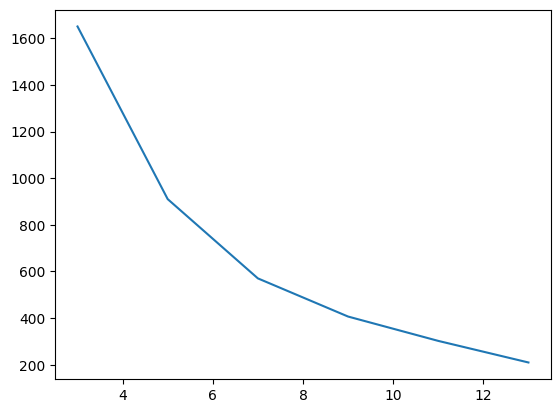

In [29]:
plt.plot(n_cluster, sse)

SSE 그래프에서 꺾이는 지점인 7로 K를 설정

In [32]:
n_clusters = 7

In [33]:
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(train_fill_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [34]:
clustered_train = kmeans.predict(train_fill_data)
clustered_valid = kmeans.predict(valid_fill_data)
clustered_test = kmeans.predict(test_fill_data)

In [35]:
clustered_test

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 0, 4, 1, 2, 1, 1, 3, 1, 6,
       4, 4, 5, 1, 6, 1, 2, 1, 1, 6, 1, 1, 6, 1, 3, 0, 4, 1, 1, 4, 1, 4,
       1, 2, 0, 3, 1, 1, 3, 1, 4, 2, 1, 3, 6, 1, 1, 1, 0, 3, 4, 4, 1, 2,
       6, 6, 4, 1, 1, 6, 3, 0, 5, 1, 6, 3, 1, 3, 3, 6, 2, 1, 1, 4, 1, 0,
       1, 1, 6, 1, 1, 4, 4, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 4, 3, 1,
       1, 6, 6, 3, 0, 6, 5, 0, 0, 3, 3, 4, 6, 0, 1, 3, 3, 1, 4, 3, 3, 3,
       1, 1, 2, 4, 4, 3, 1, 1, 5, 1, 1, 3, 1, 1, 2, 4, 0, 3, 1, 1, 1, 1,
       1, 6, 1, 6, 6, 5, 4, 1, 1, 5, 2, 1, 1, 4, 4, 3, 6, 6, 1, 1, 3, 3,
       1, 0, 1, 5, 1, 3, 3, 1, 6, 6, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 2, 1,
       1, 3, 1, 3, 3, 0, 0, 6, 1, 3, 0, 1, 0, 1, 0, 3, 4, 4, 2, 1, 3, 4,
       6, 4, 6, 3, 6, 1, 0, 3, 1, 3, 2, 1, 5, 6, 4, 4, 1, 3, 1, 4, 1, 3,
       4, 1, 6, 1, 1, 4, 1, 6, 1, 1, 2, 2, 1, 1, 1, 6, 3, 1, 4, 6],
      dtype=int32)

In [36]:
cluster_fill_value = {}
for i in range(n_clusters):
  class_mean = cluster_train_data.loc[clustered_train == i, "Age"].dropna().mean()
  cluster_fill_value[i] = class_mean

각 군집에서 빈 값에 채울 값들은 다음과 같음

In [37]:
cluster_fill_value

{0: 37.17910447761194,
 1: 27.871728395061727,
 2: 21.666666666666668,
 3: 24.838064516129034,
 4: 40.46551724137931,
 5: 41.404761904761905,
 6: 29.25}

train_data에서 빈 값에 값 채우기

In [38]:
train_na_idx = cluster_train_data.loc[cluster_train_data["Age"].isna()].index

빈 값을 갖고 있는 데이터들의 index

In [39]:
train_na_idx

Int64Index([  2,   3,   9,  17,  26,  31,  41,  49,  53,  68,
            ...
            727, 732, 733, 742, 747, 754, 760, 764, 766, 777],
           dtype='int64', length=149)

각 index가 속하는 군집은 다음과 같음   

In [40]:
clustered_train[train_na_idx]

array([1, 4, 1, 4, 6, 2, 1, 3, 1, 6, 4, 4, 3, 4, 1, 2, 6, 6, 1, 1, 2, 2,
       1, 5, 6, 1, 1, 1, 6, 6, 6, 1, 1, 6, 4, 6, 1, 0, 3, 4, 0, 4, 2, 4,
       4, 4, 1, 1, 6, 1, 2, 3, 1, 1, 1, 4, 1, 2, 0, 3, 1, 3, 2, 1, 1, 6,
       1, 3, 0, 6, 6, 6, 1, 0, 2, 1, 1, 2, 0, 6, 4, 0, 2, 2, 5, 3, 6, 6,
       2, 1, 2, 6, 3, 0, 6, 2, 6, 4, 1, 1, 6, 6, 1, 1, 2, 6, 2, 2, 0, 6,
       2, 4, 2, 6, 6, 2, 6, 1, 1, 4, 1, 6, 6, 6, 1, 1, 6, 1, 4, 1, 1, 3,
       6, 3, 1, 6, 1, 3, 6, 4, 1, 6, 1, 0, 3, 4, 4, 6, 6], dtype=int32)

각 index에 채울 값들을 가져오기

In [41]:
train_fill_value = list(map(lambda x: cluster_fill_value[x], clustered_train[train_na_idx]))

In [42]:
train_fill_value[:10]

[27.871728395061727,
 40.46551724137931,
 27.871728395061727,
 40.46551724137931,
 29.25,
 21.666666666666668,
 27.871728395061727,
 24.838064516129034,
 27.871728395061727,
 29.25]

학습에 사용할 데이터에 빈 값을 채워줌  

In [43]:
cluster_train_data.loc[train_na_idx, "Age"] = train_fill_value

빈 값이 모두 채워진 것을 확인 가능

In [44]:
cluster_train_data.loc[train_na_idx]

,Pclass,Sex,Age,Fare,Embarked
2,3,0,27.871728,69.5500,0
3,1,0,40.465517,30.5000,0
9,3,0,27.871728,7.8792,0
17,1,0,40.465517,25.9250,0
26,3,0,29.250000,15.5000,2
...,...,...,...,...,...
754,3,1,24.838065,14.5000,0
760,1,0,40.465517,0.0000,0
764,1,0,40.465517,27.7208,1
766,3,0,29.250000,6.8583,2


Valid, Test 데이터에 대해서도 동일하게 진행  
Valid, Test 데이터의 빈 값을 채울 때는 정규화와 동일하게 Train 데이터에서 구한 값으로 채워줌  

In [45]:
valid_na_idx = cluster_valid_data.loc[cluster_valid_data["Age"].isna()].index
valid_fill_value = list(map(lambda x: cluster_fill_value[x], clustered_valid[valid_na_idx]))

test_na_idx = cluster_test_data.loc[cluster_test_data["Age"].isna()].index
test_fill_value = list(map(lambda x: cluster_fill_value[x], clustered_test[test_na_idx]))

In [46]:
cluster_valid_data.loc[valid_na_idx, "Age"] = valid_fill_value
cluster_test_data.loc[test_na_idx, "Age"] = test_fill_value

## 3. Model

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### 3.1 Hyper-Parameter Tuning

각 데이터에 대해서 최고의 성능을 보이는 `n_estimators`를 찾아보기

#### 3.1.1 전체 데이터의 평균으로 채운 데이터

In [48]:
n_estimators = [n for n in range(50, 1050, 50)]

mean_accuracy = []
for n_estimator in n_estimators:
  mean_random_forest = RandomForestClassifier(n_estimators=n_estimator)
  mean_random_forest.fit(mean_train_data, train_label)
  mean_valid_pred = mean_random_forest.predict(mean_valid_data)
  mean_accuracy += [accuracy_score(valid_label, mean_valid_pred)]

In [49]:
list(zip(n_estimators, mean_accuracy))

[(50, 0.842911877394636),
 (100, 0.8544061302681992),
 (150, 0.8582375478927203),
 (200, 0.8582375478927203),
 (250, 0.8620689655172413),
 (300, 0.8544061302681992),
 (350, 0.8544061302681992),
 (400, 0.8582375478927203),
 (450, 0.8582375478927203),
 (500, 0.8620689655172413),
 (550, 0.8544061302681992),
 (600, 0.8620689655172413),
 (650, 0.8582375478927203),
 (700, 0.8544061302681992),
 (750, 0.8620689655172413),
 (800, 0.8582375478927203),
 (850, 0.8544061302681992),
 (900, 0.8582375478927203),
 (950, 0.8582375478927203),
 (1000, 0.8582375478927203)]

In [50]:
mean_best_n_estimator = n_estimators[np.argmax(mean_accuracy)]

In [ ]:
print(f"Best n_estimator for mean data is {mean_best_n_estimator}, it's valid accuracy is {max(mean_accuracy):.4f}")

#### 3.1.2 비슷한 데이터들의 평균으로 채운 데이터

In [54]:
cluster_accuracy = []
for n_estimator in n_estimators:
  cluster_random_forest = RandomForestClassifier(n_estimators=n_estimator)
  cluster_random_forest.fit(cluster_train_data, train_label)
  cluster_valid_pred = cluster_random_forest.predict(cluster_valid_data)
  cluster_accuracy += [accuracy_score(valid_label, cluster_valid_pred)]

In [55]:
list(zip(n_estimators, cluster_accuracy))

[(50, 0.842911877394636),
 (100, 0.8505747126436781),
 (150, 0.8620689655172413),
 (200, 0.8582375478927203),
 (250, 0.8582375478927203),
 (300, 0.8505747126436781),
 (350, 0.8544061302681992),
 (400, 0.8582375478927203),
 (450, 0.8582375478927203),
 (500, 0.8544061302681992),
 (550, 0.8620689655172413),
 (600, 0.8544061302681992),
 (650, 0.8544061302681992),
 (700, 0.8582375478927203),
 (750, 0.8582375478927203),
 (800, 0.8620689655172413),
 (850, 0.8582375478927203),
 (900, 0.8582375478927203),
 (950, 0.8582375478927203),
 (1000, 0.8582375478927203)]

In [57]:
cluster_best_n_estimator = n_estimators[np.argmax(cluster_accuracy)]

In [58]:
print(f"Best n_estimator for cluster data is {cluster_best_n_estimator}, it's valid accuracy is {max(cluster_accuracy):.4f}")

Best n_estimator for cluster data is 150, it's valid accuracy is 0.8621


#### 3.1.3 Best Parameter

In [59]:
mean_random_forest = RandomForestClassifier(n_estimators=mean_best_n_estimator)
cluster_random_forest = RandomForestClassifier(n_estimators=cluster_best_n_estimator)

### 3.2 학습

In [60]:
mean_random_forest.fit(mean_train_data, train_label)
cluster_random_forest.fit(cluster_train_data, train_label)

RandomForestClassifier(n_estimators=150)

### 3.3. 예측

In [63]:
mean_test_pred = mean_random_forest.predict(mean_test_data)
cluster_test_pred = cluster_random_forest.predict(cluster_test_data)

### 3.4 평가

In [64]:
mean_test_accuracy = accuracy_score(test_label, mean_test_pred)
cluster_test_accuracy = accuracy_score(test_label, cluster_test_pred)

In [65]:
print(f"Test Accuracy for mean data is {mean_test_accuracy:.4f}")
print(f"Test Accuracy for cluster data is {cluster_test_accuracy:.4f}")

Test Accuracy for mean data is 0.8550
Test Accuracy for cluster data is 0.8626
